<a href="https://colab.research.google.com/github/bits-mtech/DL/blob/main/DL_Ass1_Prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment : DL Assignment 1 Question 2
# Group No. 82
# Mriganka Gayen
# Subodh Kant Mishra
# Ashutosh Sahebrao Dhok

In [2]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# Reading the data from csv
df=pd.read_csv("https://raw.githubusercontent.com/bits-mtech/DL/main/data2_0.75_6.csv")
df.head()

,0.156326772,0.011856755,0
0,0.211109,0.032209,0
1,0.263386,0.060866,0
2,0.312221,0.097541,0
3,0.356707,0.141855,0
4,0.395976,0.193337,0


In [4]:
# Including the header for each row - feature 1, feature 2, class label.

df.columns = ["Feature_1", "Feature_2", "Class_Label"]
df.head()

,Feature_1,Feature_2,Class_Label
0,0.211109,0.032209,0
1,0.263386,0.060866,0
2,0.312221,0.097541,0
3,0.356707,0.141855,0
4,0.395976,0.193337,0


In [5]:
# a. Train two single/double hidden layer deep networks
# b. By varying the number of hidden nodes (4, 8, 12, 16) in each layer 
# c. with 70% training and 30% validation data. 
# d. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. 
# e. Report, compare, and explain the observed accuracy and minimum loss achieved.

In [6]:
# Seperating the input variables and the output variables

X = df.drop("Class_Label",axis=1)
Y = df["Class_Label"]


In [7]:
# Splitting the dataset into 70% training and 30% validation data.

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [54]:
Xtrain_shape = Xtrain.shape[1]
print (Xtrain_shape)

2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


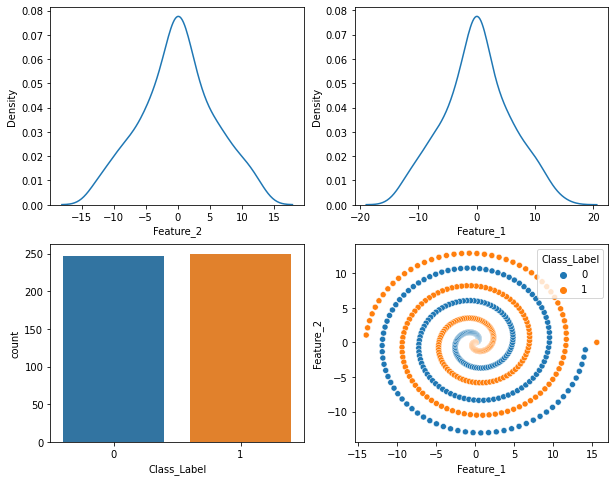

In [86]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_figwidth(10)
fig.set_figheight(8)

sns.distplot(df["Feature_2"],kde = True,hist=False, ax=axes[0,0])
sns.distplot(df["Feature_1"],kde = True,hist=False, ax=axes[0,1])
sns.countplot(x='Class_Label', data=df, ax=axes[1,0])
sns.scatterplot(data=df, x="Feature_1", y="Feature_2",hue="Class_Label",ax=axes[1,1])

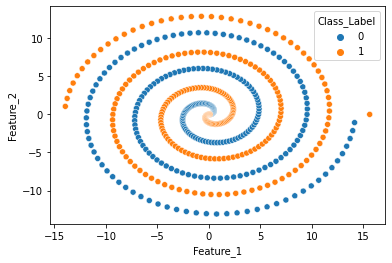

In [9]:
sns.scatterplot(data=df, x="Feature_1", y="Feature_2",hue="Class_Label")

In [49]:
X.corr()

,Feature_1,Feature_2
Feature_1,1.000000,-0.079311
Feature_2,-0.079311,1.000000


In [ ]:
Feature_1_log = np.log(df["Feature_1"].copy()) # log 
Feature_1_square_root = np.sqrt(df["Feature_1"].copy())
Feature_2_log = np.log(df["Feature_2"].copy()) # log 
Feature_2_square_root = np.sqrt(df["Feature_2"].copy())

In [58]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 1
dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(4, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 4)                 12        
                                                                 
 dense_45 (Dense)            (None, 8)                 40        
                                                                 
 dense_46 (Dense)            (None, 12)                108       
                                                                 
 dense_47 (Dense)            (None, 1)                 13        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


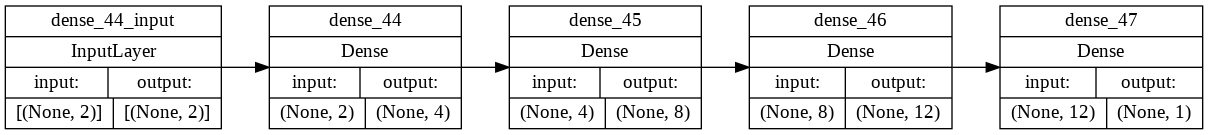

In [59]:
tensorflow.keras.utils.plot_model(dnnModel, show_shapes=True, rankdir="LR")

In [60]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)
_, train_acc = dnnModel.evaluate(Xtrain, Ytrain, verbose=1)
_, test_acc = dnnModel.evaluate(test_images, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/25
11/11 [==============================] - 1s 20ms/step - loss: 0.7221 - accuracy: 0.5014 - val_loss: 0.7090 - val_accuracy: 0.5067
Epoch 2/25
11/11 [==============================] - 0s 6ms/step - loss: 0.7000 - accuracy: 0.5014 - val_loss: 0.6984 - val_accuracy: 0.5067
Epoch 3/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.5014 - val_loss: 0.6951 - val_accuracy: 0.5067
Epoch 4/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5014 - val_loss: 0.6934 - val_accuracy: 0.5067
Epoch 5/25
11/11 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.5014 - val_loss: 0.6938 - val_accuracy: 0.5067
Epoch 6/25
11/11 [==============================] - 0s 7ms/step - loss: 0.6864 - accuracy: 0.5014 - val_loss: 0.6926 - val_accuracy: 0.5067
Epoch 7/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.5014 - val_loss: 0.6922 - val_accuracy: 0.5067
Epoch 8/25
11/11 [=

NameError: ignored

In [12]:
# plotting the training accuracy
def plot_history(h):
 
    plt.plot(h.history['val_accuracy'], label='validation accuracy')
    plt.plot(h.history['accuracy'], label='train accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')    
    plt.legend()
    plt.title("Plot of Accuracy")
    
    plt.show()

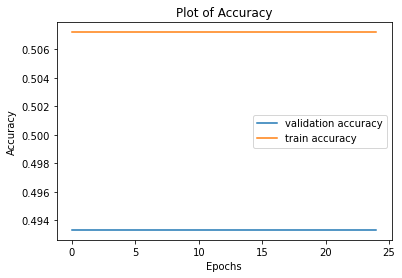

In [13]:
hist = plot_history(h)

In [14]:
# plotting the training accuracy
def plot_history(h):
    
    plt.plot(h.history['val_loss'], label='validation loss')
    plt.plot(h.history['loss'], label='train loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title("Plot of Loss")
    
    

    plt.show()

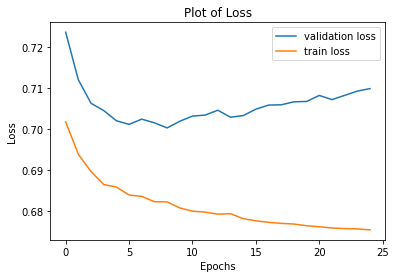

In [15]:
hist = plot_history(h)

In [16]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 2


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(4, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# Add dropout of 25% to layer 2
dnnModel.add(Dropout(0.25))
# layer 3 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# Add dropout of 25% to layer 3
dnnModel.add(Dropout(0.25))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 8)                 40        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 12)                108       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable 

In [17]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 2s 43ms/step - loss: 1.0700 - accuracy: 0.5072 - val_loss: 0.7874 - val_accuracy: 0.4933
Epoch 2/25
11/11 [==============================] - 0s 14ms/step - loss: 1.0655 - accuracy: 0.5072 - val_loss: 0.7458 - val_accuracy: 0.4933
Epoch 3/25
11/11 [==============================] - 0s 8ms/step - loss: 0.8864 - accuracy: 0.5072 - val_loss: 0.7256 - val_accuracy: 0.4933
Epoch 4/25
11/11 [==============================] - 0s 10ms/step - loss: 0.8514 - accuracy: 0.5072 - val_loss: 0.7152 - val_accuracy: 0.4933
Epoch 5/25
11/11 [==============================] - 0s 10ms/step - loss: 0.8153 - accuracy: 0.5072 - val_loss: 0.7079 - val_accuracy: 0.4933
Epoch 6/25
11/11 [==============================] - 0s 9ms/step - loss: 0.8349 - accuracy: 0.5072 - val_loss: 0.7044 - val_accuracy: 0.4933
Epoch 7/25
11/11 [==============================] - 0s 15ms/step - loss: 0.7970 - accuracy: 0.5072 - val_loss: 0.7030 - val_accuracy: 0.4933
Epoch 8/25
11/1

In [18]:
# plotting the training accuracy
def plot_history(h):
   
    plt.plot(h.history['val_accuracy'], label='validation accuracy')
    plt.plot(h.history['accuracy'], label='train accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')    
    plt.legend()
    plt.title("Plot of Accuracy")
    
    plt.show()

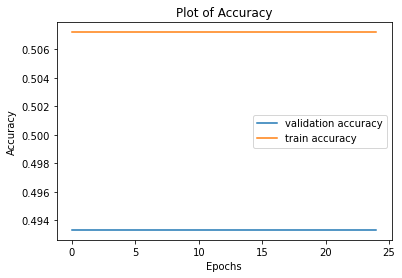

In [19]:
hist = plot_history(h)

In [20]:
# plotting the training accuracy
def plot_history(h):
    
    plt.plot(h.history['val_loss'], label='validation loss')
    plt.plot(h.history['loss'], label='train loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title("Plot of Loss")
    
    

    plt.show()

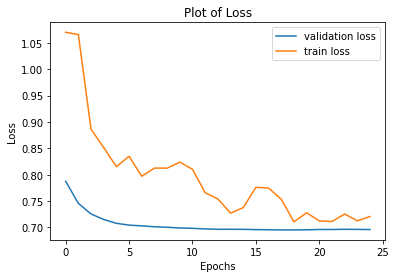

In [21]:
hist = plot_history(h)

In [22]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 3


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(8, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(16, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 24        
                                                                 
 dense_9 (Dense)             (None, 12)                108       
                                                                 
 dense_10 (Dense)            (None, 16)                208       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 2s 61ms/step - loss: 0.8377 - accuracy: 0.5072 - val_loss: 0.8834 - val_accuracy: 0.4933
Epoch 2/25
11/11 [==============================] - 0s 13ms/step - loss: 0.7759 - accuracy: 0.5072 - val_loss: 0.8233 - val_accuracy: 0.4933
Epoch 3/25
11/11 [==============================] - 0s 13ms/step - loss: 0.7330 - accuracy: 0.5072 - val_loss: 0.7783 - val_accuracy: 0.4933
Epoch 4/25
11/11 [==============================] - 0s 13ms/step - loss: 0.7074 - accuracy: 0.5072 - val_loss: 0.7527 - val_accuracy: 0.4933
Epoch 5/25
11/11 [==============================] - 0s 10ms/step - loss: 0.6925 - accuracy: 0.5072 - val_loss: 0.7394 - val_accuracy: 0.4933
Epoch 6/25
11/11 [==============================] - 0s 24ms/step - loss: 0.6862 - accuracy: 0.5072 - val_loss: 0.7271 - val_accuracy: 0.4933
Epoch 7/25
11/11 [==============================] - 0s 12ms/step - loss: 0.6824 - accuracy: 0.5072 - val_loss: 0.7216 - val_accuracy: 0.4933
Epoch 8/25
11

In [24]:
# plotting the training accuracy
def plot_history(h):
   
    plt.plot(h.history['val_accuracy'], label='validation accuracy')
    plt.plot(h.history['accuracy'], label='train accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')    
    plt.legend()
    plt.title("Plot of Accuracy")
    
    plt.show()

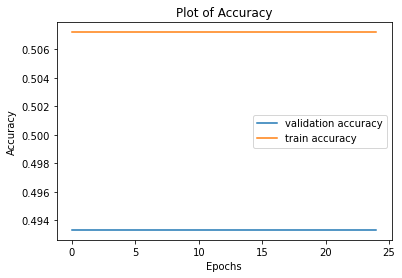

In [25]:
hist = plot_history(h)

In [26]:
# plotting the training accuracy
def plot_history(h):
    
    plt.plot(h.history['val_loss'], label='validation loss')
    plt.plot(h.history['loss'], label='train loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title("Plot of Loss")
    
    

    plt.show()

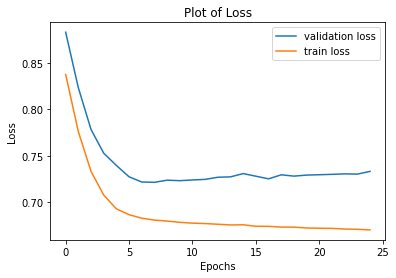

In [27]:
hist = plot_history(h)

In [28]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 4


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(8, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# Add dropout of 25% to layer 2
dnnModel.add(Dropout(0.25))
# layer 3 = hidden layer
dnnModel.add(Dense(16, activation = 'relu'))
# Add dropout of 25% to layer 3
dnnModel.add(Dropout(0.25))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 24        
                                                                 
 dense_13 (Dense)            (None, 12)                108       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                208       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 357
Trainable params: 357
Non-trainable 

In [29]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 34ms/step - loss: 0.9690 - accuracy: 0.5072 - val_loss: 0.7549 - val_accuracy: 0.4933
Epoch 2/25
11/11 [==============================] - 0s 12ms/step - loss: 0.9211 - accuracy: 0.5072 - val_loss: 0.7092 - val_accuracy: 0.4933
Epoch 3/25
11/11 [==============================] - 0s 9ms/step - loss: 0.8408 - accuracy: 0.5072 - val_loss: 0.6921 - val_accuracy: 0.4933
Epoch 4/25
11/11 [==============================] - 0s 8ms/step - loss: 0.8485 - accuracy: 0.5072 - val_loss: 0.6936 - val_accuracy: 0.4933
Epoch 5/25
11/11 [==============================] - 0s 12ms/step - loss: 0.8199 - accuracy: 0.5072 - val_loss: 0.6994 - val_accuracy: 0.4933
Epoch 6/25
11/11 [==============================] - 0s 10ms/step - loss: 0.8500 - accuracy: 0.5072 - val_loss: 0.7043 - val_accuracy: 0.4933
Epoch 7/25
11/11 [==============================] - 0s 9ms/step - loss: 0.8198 - accuracy: 0.5072 - val_loss: 0.7082 - val_accuracy: 0.4933
Epoch 8/25
11/11

In [30]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 5


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(8, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# Add dropout of 5% to layer 2
dnnModel.add(Dropout(0.5))
# layer 3 = hidden layer
dnnModel.add(Dense(16, activation = 'relu'))
# Add dropout of 5% to layer 3
dnnModel.add(Dropout(0.5))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 24        
                                                                 
 dense_17 (Dense)            (None, 12)                108       
                                                                 
 dropout_4 (Dropout)         (None, 12)                0         
                                                                 
 dense_18 (Dense)            (None, 16)                208       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 357
Trainable params: 357
Non-trainable 

In [31]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 2s 42ms/step - loss: 1.3686 - accuracy: 0.5072 - val_loss: 0.8395 - val_accuracy: 0.4933
Epoch 2/25
11/11 [==============================] - 0s 14ms/step - loss: 1.2965 - accuracy: 0.5072 - val_loss: 0.7885 - val_accuracy: 0.4933
Epoch 3/25
11/11 [==============================] - 0s 12ms/step - loss: 1.4463 - accuracy: 0.5072 - val_loss: 0.7684 - val_accuracy: 0.4933
Epoch 4/25
11/11 [==============================] - 0s 21ms/step - loss: 1.1970 - accuracy: 0.5072 - val_loss: 0.7723 - val_accuracy: 0.4933
Epoch 5/25
11/11 [==============================] - 0s 15ms/step - loss: 1.1907 - accuracy: 0.5072 - val_loss: 0.7802 - val_accuracy: 0.4933
Epoch 6/25
11/11 [==============================] - 0s 12ms/step - loss: 1.1327 - accuracy: 0.5072 - val_loss: 0.7949 - val_accuracy: 0.4933
Epoch 7/25
11/11 [==============================] - 0s 9ms/step - loss: 1.0550 - accuracy: 0.5072 - val_loss: 0.7940 - val_accuracy: 0.4933
Epoch 8/25
11/

In [32]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 6


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(16, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                48        
                                                                 
 dense_21 (Dense)            (None, 12)                204       
                                                                 
 dense_22 (Dense)            (None, 8)                 104       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 2s 35ms/step - loss: 0.8335 - accuracy: 0.5072 - val_loss: 0.9196 - val_accuracy: 0.4933
Epoch 2/25
11/11 [==============================] - 0s 7ms/step - loss: 0.7368 - accuracy: 0.5072 - val_loss: 0.8006 - val_accuracy: 0.4933
Epoch 3/25
11/11 [==============================] - 0s 12ms/step - loss: 0.6959 - accuracy: 0.5072 - val_loss: 0.7648 - val_accuracy: 0.4933
Epoch 4/25
11/11 [==============================] - 0s 10ms/step - loss: 0.6912 - accuracy: 0.5072 - val_loss: 0.7493 - val_accuracy: 0.4933
Epoch 5/25
11/11 [==============================] - 0s 8ms/step - loss: 0.6822 - accuracy: 0.5072 - val_loss: 0.7478 - val_accuracy: 0.4933
Epoch 6/25
11/11 [==============================] - 0s 10ms/step - loss: 0.6797 - accuracy: 0.5072 - val_loss: 0.7461 - val_accuracy: 0.4933
Epoch 7/25
11/11 [==============================] - 0s 12ms/step - loss: 0.6775 - accuracy: 0.5072 - val_loss: 0.7446 - val_accuracy: 0.4933
Epoch 8/25
11/1

In [34]:
# Splitting the dataset into 70% training and 30% validation data.

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [35]:
Xtrain_shape = Xtrain.shape[1]
print (Xtrain_shape)

2


In [36]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 7


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(16, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                48        
                                                                 
 dense_25 (Dense)            (None, 12)                204       
                                                                 
 dense_26 (Dense)            (None, 8)                 104       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 20ms/step - loss: 0.8888 - accuracy: 0.5014 - val_loss: 0.8674 - val_accuracy: 0.5067
Epoch 2/25
11/11 [==============================] - 0s 4ms/step - loss: 0.7775 - accuracy: 0.5014 - val_loss: 0.7625 - val_accuracy: 0.5067
Epoch 3/25
11/11 [==============================] - 0s 4ms/step - loss: 0.7234 - accuracy: 0.5014 - val_loss: 0.7190 - val_accuracy: 0.5067
Epoch 4/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.5014 - val_loss: 0.7069 - val_accuracy: 0.5067
Epoch 5/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5014 - val_loss: 0.7004 - val_accuracy: 0.5067
Epoch 6/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.5014 - val_loss: 0.7000 - val_accuracy: 0.5067
Epoch 7/25
11/11 [==============================] - 0s 6ms/step - loss: 0.6877 - accuracy: 0.5014 - val_loss: 0.6953 - val_accuracy: 0.5067
Epoch 8/25
11/11 [=

In [38]:
# Splitting the dataset into 70% training and 30% validation data.

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [39]:
Xtrain_shape = Xtrain.shape[1]
print (Xtrain_shape)

2


In [40]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 8


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(16, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                48        
                                                                 
 dense_29 (Dense)            (None, 12)                204       
                                                                 
 dense_30 (Dense)            (None, 8)                 104       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 20ms/step - loss: 0.7461 - accuracy: 0.4841 - val_loss: 0.7590 - val_accuracy: 0.5467
Epoch 2/25
11/11 [==============================] - 0s 6ms/step - loss: 0.7204 - accuracy: 0.4841 - val_loss: 0.7392 - val_accuracy: 0.5467
Epoch 3/25
11/11 [==============================] - 0s 7ms/step - loss: 0.7039 - accuracy: 0.4841 - val_loss: 0.7293 - val_accuracy: 0.5467
Epoch 4/25
11/11 [==============================] - 0s 7ms/step - loss: 0.6976 - accuracy: 0.4841 - val_loss: 0.7179 - val_accuracy: 0.5467
Epoch 5/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.4841 - val_loss: 0.7147 - val_accuracy: 0.5467
Epoch 6/25
11/11 [==============================] - 0s 6ms/step - loss: 0.6869 - accuracy: 0.4841 - val_loss: 0.7110 - val_accuracy: 0.5467
Epoch 7/25
11/11 [==============================] - 0s 7ms/step - loss: 0.6839 - accuracy: 0.4841 - val_loss: 0.7100 - val_accuracy: 0.5467
Epoch 8/25
11/11 [=

In [42]:
# Splitting the dataset into 70% training and 30% validation data.

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 7)

In [43]:
Xtrain_shape = Xtrain.shape[1]
print (Xtrain_shape)

2


In [44]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 9


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(16, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                48        
                                                                 
 dense_33 (Dense)            (None, 12)                204       
                                                                 
 dense_34 (Dense)            (None, 8)                 104       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 21ms/step - loss: 0.7316 - accuracy: 0.5014 - val_loss: 0.7000 - val_accuracy: 0.5067
Epoch 2/25
11/11 [==============================] - 0s 5ms/step - loss: 0.7047 - accuracy: 0.5014 - val_loss: 0.6895 - val_accuracy: 0.5067
Epoch 3/25
11/11 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.5014 - val_loss: 0.6863 - val_accuracy: 0.5067
Epoch 4/25
11/11 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5014 - val_loss: 0.6864 - val_accuracy: 0.5067
Epoch 5/25
11/11 [==============================] - 0s 6ms/step - loss: 0.6908 - accuracy: 0.5014 - val_loss: 0.6861 - val_accuracy: 0.5067
Epoch 6/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.5014 - val_loss: 0.6865 - val_accuracy: 0.5067
Epoch 7/25
11/11 [==============================] - 0s 6ms/step - loss: 0.6884 - accuracy: 0.5014 - val_loss: 0.6858 - val_accuracy: 0.5067
Epoch 8/25
11/11 [=